# <span style="color:red"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue"> Esercitazione 1 </span>

## Exercise 1.1

Let's start including the libraries and defining the constants used in the statistics calculations.

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy.stats import norm
M=10000 #number of throws
N=100 #number of blocks
n_bins = 50 #number of bins
teo_chi = 100 #chi^2 expected value
b = 10

<Figure size 720x432 with 0 Axes>

### Exercise 1 - Data Blocking Technique

The exercise aims to test the pseudo-random uniform distribution of the Pseudo-Random Number generator using the Data Blocking Technique.


Data blocking is a technique that allows us to divide computational work into separate subproblems, bringing various benefits, including:

- The ability to save runtime progress, safeguarding against potential blackouts that could otherwise be catastrophic.
- The ability to resume a previously interrupted simulation to improve precision.
- The ability to perform parallel computing across multiple processors, reducing execution times while maintaining the same level of computational work.

Implementing data blocking is quite straightforward:

1. Choose two parameters (since clearly, M=N*L) from M (total number of steps), N (number of blocks), and L (number of steps per block).

2. Repeat the following process for N blocks:

   - Perform a random operation L times, accumulating the extracted values and their squares.
   - Update the running mean and its standard deviation.
   - Save the progress to a file.

The chosen parameters are:
M = 10000
N = 100


###  Exercise 1.1.1 - linear integral

Test the Pseudo-Random Number generator by estimating the integer: $\langle r \rangle = \int_0^1 r dr$.

Compute average and Standard deviation with a large number of throws $M$, as a function of the number of blocks $N$.

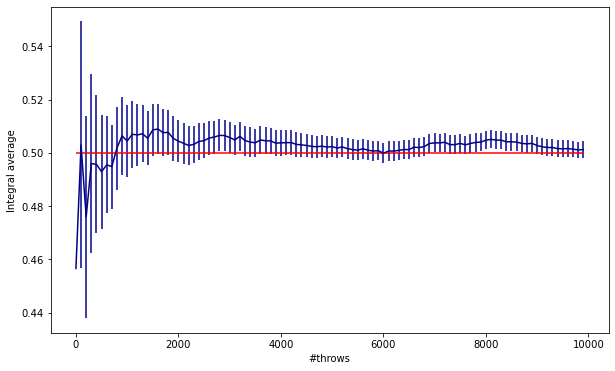

Estimation of the integral mean value:  0.501  +-  0.003


In [47]:
sum_prog, err_prog = np.loadtxt("./data/dati1.1.1.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(N)*M/N

plt.figure(figsize = (10,6))
plt.errorbar(x,sum_prog,yerr=err_prog,color="darkblue")
plt.hlines(0.5,0,x[-1], label ="Theory", color = "red")
plt.xlabel('#throws')
plt.ylabel('Integral average')
plt.grid(False)
plt.show()

print("Estimation of the integral mean value: ",round(sum_prog[-1],3)," +- ", round(err_prog[-1],3))

### Exercise 1.1.2
The second picture show the estimation of $\sigma^2$ and its uncertainty given by $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

In [3]:
sum_prog, err_prog = np.loadtxt("./data/dati1.1.2.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(100)*M/N

plt.figure(figsize = (10,6))
plt.errorbar(x,sum_prog,yerr=err_prog,color="darkblue")
plt.hlines(1/12,0,x[-1], label ="Theory", color = "red")
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>')
plt.grid(False)
plt.show()
print("Estimation of the integral mean value: ",round(sum_prog[-1],4)," +- ", round(err_prog[-1],4))

NameError: name 'np' is not defined

### Exercise 01.1.3
The Pearson cumulative test statistic, symbolized as $\chi^2$, functions as a quantifier of the disparity between the actual observed values, represented as $O_i$, and the anticipated or expected values, denoted as $E_i$. The formula for $\chi^2$ is articulated as the summation over all elements of the squared discrepancies between observed and expected values, normalized by the expected values themselves:

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

We cannot use the Pearson cumulative test to prove that random variables *r*, are drawn from a particular distribution. We can attempt to estimate the probability that *r* is not sampled from a uniform distribution and if the probability is low, we can confidently discard the mentioned hypothesis. In this case the chi-square statistic is:

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

$\chi^2$ values waves around 100, the number of sub-intervals.

The picture show 100 values of $\chi^2$ less theory expectation.

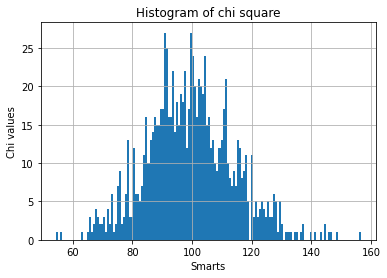

In [58]:
chi_cum = np.loadtxt("./data/chi2.dat", usecols=(0), delimiter=',', unpack='true')
n_bins = 150
# the histogram of the data
chi_cum, bins, patches = plt.hist(chi_cum, n_bins, density=False)

plt.figure(figsize = (10,6))
plt.xlabel('#throws')
plt.ylabel('Chi values')
plt.title('Histogram of chi square')
plt.grid(True)
plt.show()

**Conclusion:**

If the reduced Chi square ( Chi square divided by the number of Degree of Freedom (DoF)) value is large it is a rad flag that dismisses the hypothesis.
The closer the reduced frame is to 1 the greater the probability that the hypothesis is valid.

We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals. In this example the DoF is given by the number of categories less the number of parameters: DoF = M.

This means that the Chi square satisfies very well the hypothesis.

### Exercise 1.2

This exercise aims to proof the Central Limit Theorem (CLT) for Uniform, Exponential and Lorentzian distributions. CLT states that the mean values from M probability distributions having the same first and second moments undergo a normal distributions.

The Central Limit Theorem (CLT) is a fundamental concept in statistics that explains how the distribution of the sum or average of a large number of independent, identically (with same first and second momentum) distributed random variables tends to resemble a normal (bell-shaped) distribution, regardless of the original distribution of those variables. Let's explore this concept with three examples: the uniform distribution, exponential distribution, and Lorentzian distribution.

1. **Uniform Distribution**:

Imagine you have a six-sided die, and you roll it repeatedly, recording the average value of each roll. The uniform distribution is flat and looks like a rectangle, as each side of the die has an equal chance of landing face up.

As you roll the die more and more times and calculate the average of each roll, the Central Limit Theorem tells us that the distribution of those averages will start to look like a bell-shaped curve, even though the original distribution was flat. This is because the more rolls you make, the closer the average gets to the expected value (3.5 for a fair six-sided die), and the bell curve emerges.




In [101]:
from scipy.stats import cauchy

N=[1,2,10,100]

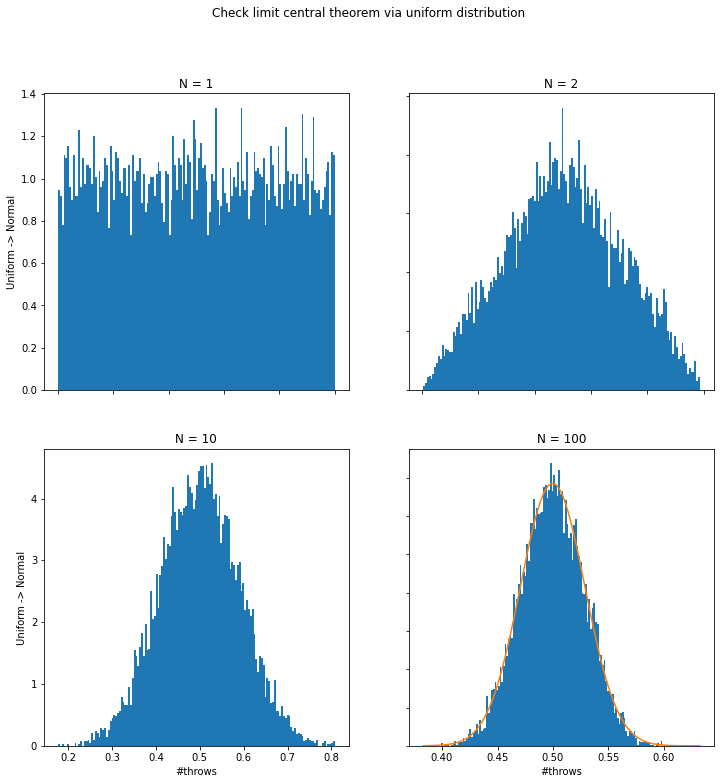

In [92]:
data = np.loadtxt("./data/normal.dat", usecols=(0,1,2,3), delimiter=',', unpack='false')

fig, axs = plt.subplots(2, 2,figsize=(12,12))
fig.suptitle('Check limit central theorem via uniform distribution')

count = 0
for ax in axs:
    for a in ax:
        _, bins,_ = a.hist(data[count], n_bins, density=True)
        a.set_title(f'N = {N[count]}')
        count = count+1

for ax in axs.flat:
    ax.set(xlabel='#throws', ylabel='Uniform -> Normal')
    ax.label_outer()

mean,std=norm.fit(data[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Gaussian fit")

2. **Exponential Distribution**:

Consider a situation where you're measuring the time it takes for a light bulb to burn out, and these times follow an exponential distribution. The exponential distribution looks like a steeply decreasing curve.

If you take many such measurements and calculate the average burnout time, the Central Limit Theorem tells us that the distribution of these averages will start to look like a bell-shaped curve, even though the original distribution was decreasing. This happens because the law of large numbers makes the average burnout time converge to a certain value, and the normal distribution appears.

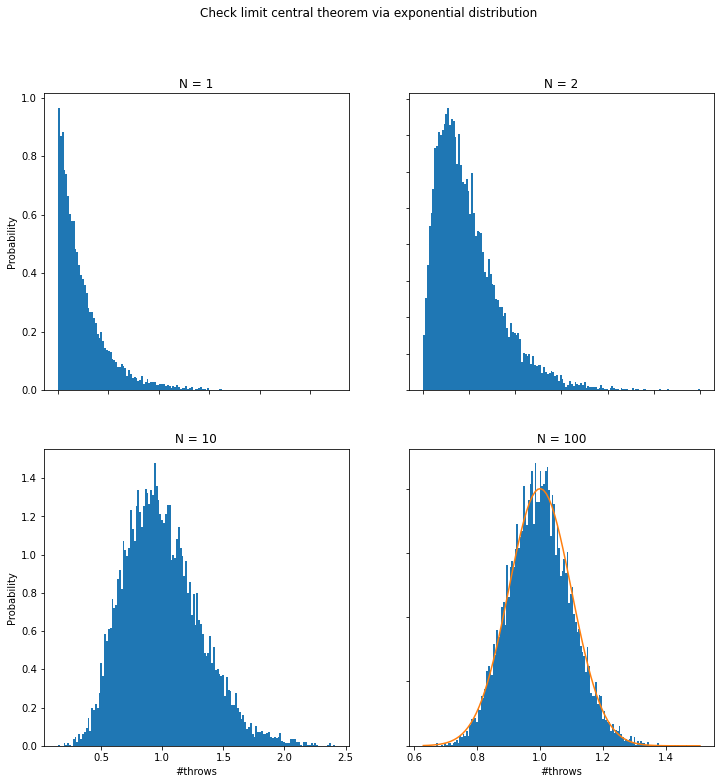

In [94]:
data = np.loadtxt("./data/exponential.dat", usecols=(0,1,2,3), delimiter=',', unpack='true')
# the histogram of the data
fig, axs = plt.subplots(2, 2,figsize=(12,12))

fig.suptitle('Check limit central theorem via exponential distribution')
count = 0
for ax in axs:
    for a in ax:
        a.hist(date[count], n_bins, density=True)
        a.set_title(f'N = {N[count]}')
        count = count+1
for ax in axs.flat:
    ax.set(xlabel='#throws', ylabel='Probability')
    ax.label_outer()
    
mean,std=norm.fit(data[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Gaussian fit")

3. **Lorentzian Distribution**:

The Lorentzian distribution is a special case that doesn't quite follow the Central Limit Theorem. It's known for its "heavy tails," meaning it has a longer tail than a normal distribution and doesn't approach a bell shape as you add more samples.

If you were to measure some physical quantity that follows a Lorentzian distribution and calculate the average, the Central Limit Theorem wouldn't apply in the same way as with the previous examples. In this case, the distribution of the averages won't turn into a normal curve because the Lorentzian distribution doesn't satisfy the conditions necessary for the CLT to fully take effect. Instead, you'd still see the heavy tails characteristic of the Lorentzian distribution

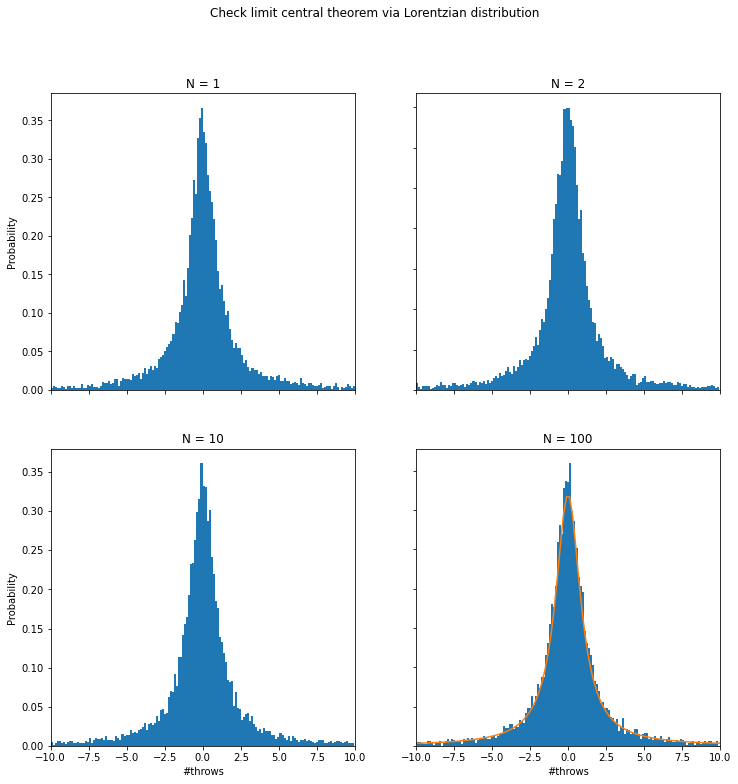

In [102]:
data = np.loadtxt("./data/lorentian.dat", usecols=(0,1,2,3), delimiter=',', unpack='True')
# the histogram of the data
fig, axs = plt.subplots(2, 2,figsize=(12,12))
fig.suptitle('Check limit central theorem via Lorentzian distribution')
count = 0
for ax in axs:
    for a in ax:
        #seleziono solo gli elementi compresi tra -b e b per non dovere usare un numero esorbitante di bins
        a.hist([x for x in date[count] if abs(x) < b], n_bins, density=True)
        a.set_title(f'N = {N[count]}')
        a.set_xlim(-b,b)
        count = count+1

for ax in axs.flat:
    ax.set(xlabel='#throws', ylabel='Probability')
    ax.label_outer()

mean,std=cauchy.fit(data[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = cauchy.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Lorentian fit")  


**Conclusion:**

In summary, the Central Limit Theorem tells us that for many types of random variables, when we add up or average a large number of them, the resulting distribution starts to resemble a normal distribution. However, this doesn't apply universally, and exceptions like the Lorentzian distribution can exist.

## Exercise 01.3 - Buffon's Needle Experiment in 2D

Buffon's Needle is a classic probability experiment used to estimate the value of π (pi). Imagine a 2D space with a width of 100 units. We have rows of parallel lines spaced 1 unit apart.

Now, take a needle with a length of 0.5 units and randomly drop it onto the 2D space. The goal is to find the probability that the needle will cross one of the parallel lines.

By conducting many drops and recording how many times the needle crosses a line, we can use this information to estimate the value of π, a fundamental mathematical constant.

The formula for estimating π using this experiment is:

$$\pi ≈ (2 \cdot N_{tot}) / (N_{cross})$$

As you collect more data from dropping the needle, your estimate of π becomes more accurate.

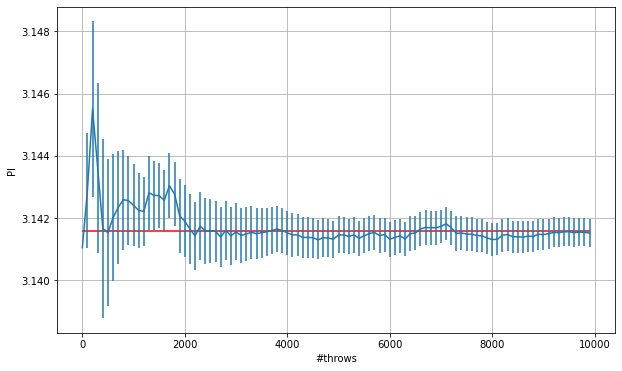

Estimation of the integral pi greco mean value:  3.1415  +-  0.0004


In [78]:
sum_prog, err_prog = np.loadtxt("./data/pigreco.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(N)*M/N

plt.figure(figsize = (10,6))
plt.hlines(np.pi,0,x[-1], label ="Theory", color = "red")
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('PI')
plt.grid(False)
plt.show()
print("Estimation of the integral pi greco mean value: ",round(sum_prog[-1],4)," +- ", round(err_prog[-1],4))